# Visualization

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Load your CSV file
df = pd.read_csv("dataset/data2.csv")

# Assuming 'label' is the label column
sentences = df['sentence']
individuals = df['individual']

# Extracting features (excluding the label column)
features = df.drop(columns=['sentence', 'individual'])
random_columns = np.random.choice(features.columns, size=8, replace=False)

# Select the columns
selected_features = df[random_columns]

# Get unique labels and assign colors
unique_sentences = sentences.unique()
sentence_color = sns.color_palette("husl", len(unique_sentences))

# Get unique labels and assign colors
unique_individual = individuals.unique()
individual_color = sns.color_palette("husl", len(unique_individual))

# Plot each feature in a separate graph
num_features = len(selected_features.columns)


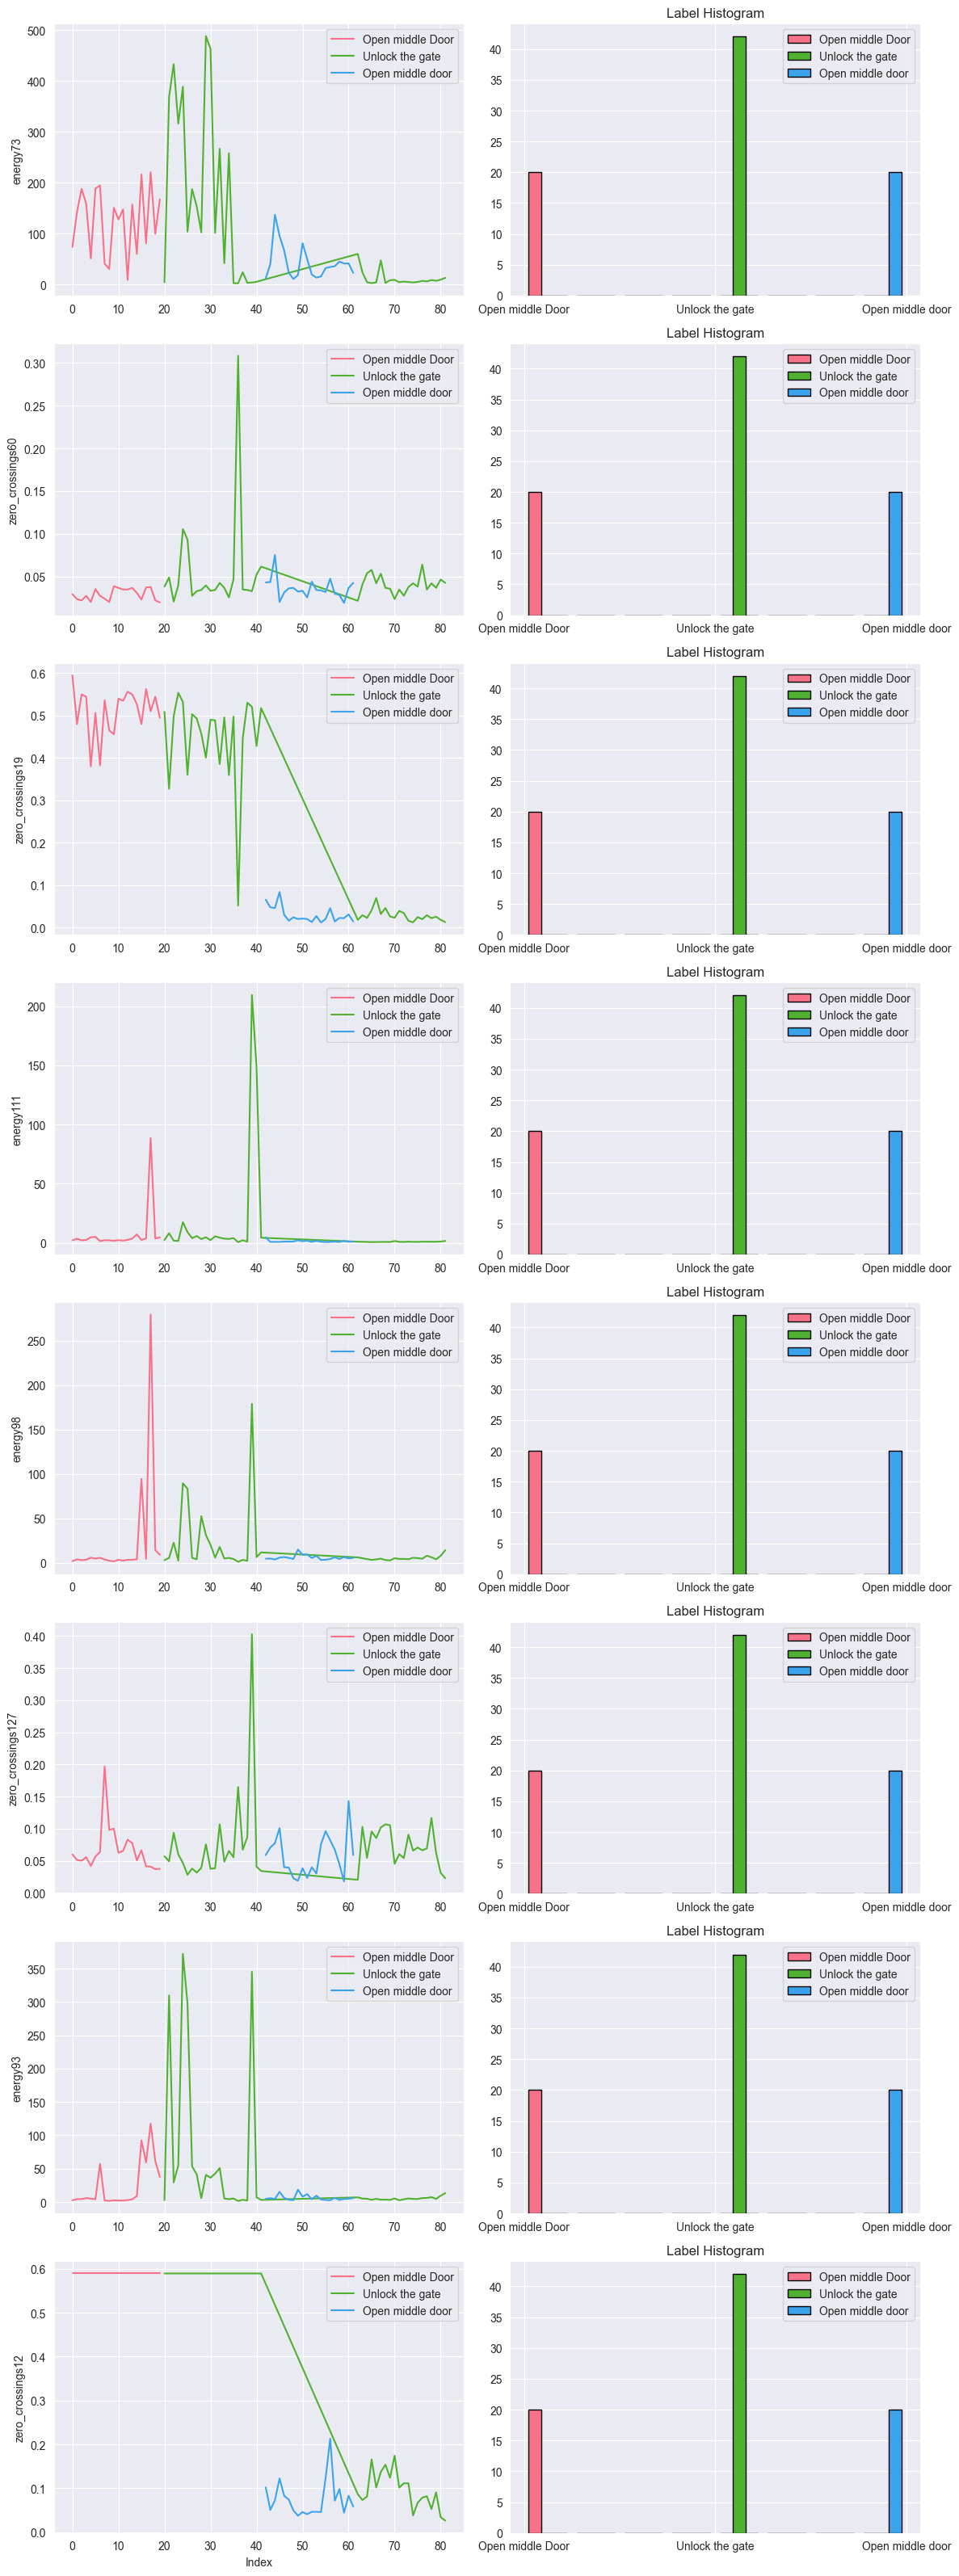

In [80]:
# Set up subplots for features
fig, axes = plt.subplots(num_features, 2, figsize=(12, 4 * num_features))

# Iterate through features
for i, feature in enumerate(selected_features.columns):
    # Plot feature as line with different colors for each label
    for sentence, color in zip(unique_sentences, sentence_color):
        subset = df[df['sentence'] == sentence]
        axes[i, 0].plot(subset.index, subset[feature], label=f'{sentence}', color=color)

    axes[i, 0].set_ylabel(feature)
    axes[i, 0].legend()

    # Plot histogram for labels with different colors
    axes[i, 1].hist([sentences[sentences == label] for label in unique_sentences], bins='auto', edgecolor='black', label=unique_sentences, color=sentence_color)
    axes[i, 1].set_title('Label Histogram')
    axes[i, 1].legend()

# Add a common X-axis label for features
axes[-1, 0].set_xlabel('Index')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

# Remove Outliers

In [6]:
import pandas as pd

def remove_outliers(df, factor=1.5):
    """
    Remove outliers from each column in a DataFrame using the IQR method.

    Parameters:
    - df: DataFrame
    - factor: Float, multiplier for IQR. Values outside (Q1 - factor * IQR, Q3 + factor * IQR) are considered outliers.

    Returns:
    - DataFrame without outliers.
    """
    df_no_outliers = pd.DataFrame()

    for column in df.columns:
        # Calculate the quartiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the outlier range
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR

        # Filter values within the range (non-outliers)
        filtered_values = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)][column]

        # Concatenate the column without outliers to the new DataFrame
        df_no_outliers = pd.concat([df_no_outliers, filtered_values], axis=1)

    return df_no_outliers

features = remove_outliers(features)


In [7]:
features.dropna(axis=0, inplace=True, thresh=280)
features.head

<bound method NDFrame.head of     mean_chroma_phase1  mean_chroma_phase2  mean_chroma_phase3  \
0            -2.847260            0.489295           -0.503390   
1             1.905757           -2.055633           -0.369882   
2            -2.586586           -0.082852            0.246836   
3             2.518156           -0.629246            3.051131   
4             2.900859           -0.360961            0.611968   
5             2.448762           -0.799400            2.563234   
7            -2.411065            0.004082            2.246377   
8            -3.035895           -0.950547            2.309362   
9             2.747437           -0.753593            2.516932   
10            2.289949           -0.959511            2.519242   
11            2.838262           -0.464920            2.976528   
12            2.694693           -0.389190           -3.140129   
13            2.892782           -0.132284            0.249282   
20            2.947834           -0.974875    

# Imports

In [13]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score,roc_auc_score
import matplotlib.pyplot as plt
from sklearn import metrics
import glob
from scipy import signal
import seaborn as sn
from sklearn.metrics import classification_report
import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Reading Data

In [14]:
# Load your CSV file
df = pd.read_csv("dataset/data2.csv")

x_df = df.iloc[:, :304]
y_df = df.iloc[:, 304]
ind_df = df.iloc[:, 305]

x_data=x_df.values
y_data=y_df.values
ind_data=ind_df.values

print(x_data.shape)
print(y_data.shape)
print(ind_data.shape)

(82, 304)
(82,)
(82,)


In [15]:
Xsc = StandardScaler().fit_transform(x_data)
Xsc=pd.DataFrame(Xsc)
y=pd.DataFrame(y_data)
Xsc.head()

,0,1,2,3,4,5,6,7,8,9,...,294,295,296,297,298,299,300,301,302,303
0,-1.534532,0.890304,-0.427358,0.381765,0.686218,-0.792425,0.233200,-1.414686,0.171989,-0.994577,...,-0.107409,-0.147470,-0.146476,-0.155942,-0.163179,-0.164639,-0.142114,-0.124991,-0.143434,-0.135580
1,0.450228,-1.797933,-0.355077,0.890671,-0.215055,0.786222,-0.476384,-0.819102,0.559968,-0.121305,...,-0.115075,-0.134585,-0.011686,-0.006005,-0.105165,-0.136522,-0.127795,-0.124173,-0.110736,-0.100375
2,-1.425680,0.285938,-0.021189,0.716472,0.348405,1.554134,0.229701,1.735311,0.807568,-0.467947,...,-0.120308,-0.148384,-0.142529,-0.150751,-0.155518,-0.159924,-0.137892,-0.123809,-0.144018,-0.135131
3,0.705953,-0.291224,1.497044,0.516727,1.091048,0.141513,1.475062,1.286271,-0.791111,0.028576,...,-0.161073,-0.160484,-0.140036,-0.152075,-0.157326,-0.158943,-0.139918,-0.135773,-0.151718,-0.127348
4,0.865762,-0.007831,0.176492,0.922043,0.683156,-0.662540,0.442878,-1.377999,-1.178802,1.315161,...,-0.006750,-0.059012,-0.103477,-0.131294,-0.150782,-0.146381,-0.132818,-0.120235,-0.124561,-0.104893


In [16]:
remove_outliers(Xsc)
Xsc.shape

(82, 304)

# Model

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Xsc, y, test_size=0.2, random_state=0)

# Instantiate the GradientBoostingClassifier
gbm_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# Fit the classifier to the training set
gbm_classifier.fit(X_train, y_train.values.ravel())

# Make predictions on the test set
y_pred = gbm_classifier.predict(X_test)

# Print accuracy score
print(f'Accuracy score: {accuracy_score(y_test, y_pred):0.4f}')

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)

Accuracy score: 0.8235
[[3 0 0]
 [0 4 0]
 [1 2 7]]


# Results

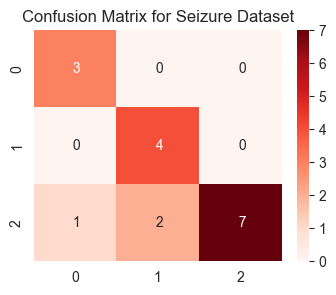

                  precision    recall  f1-score   support

Open middle Door       0.75      1.00      0.86         3
Open middle door       0.67      1.00      0.80         4
 Unlock the gate       1.00      0.70      0.82        10

        accuracy                           0.82        17
       macro avg       0.81      0.90      0.83        17
    weighted avg       0.88      0.82      0.82        17


In [18]:
plt.figure(figsize=(4,3))
plt.title('Confusion Matrix for Seizure Dataset')
sn.heatmap(cf_matrix, annot=True, fmt=' ', cmap='Reds')
plt.show()

print(classification_report(y_test, y_pred))

# Saving the Model

In [89]:
joblib.dump(gbm_classifier, 'svm_model.pkl')

['svm_model.pkl']

In [90]:
print(gbm_classifier.predict())

TypeError: ForestClassifier.predict() missing 1 required positional argument: 'X'